# Polynomial Regression for Position Salaries

If we talk about linear regression, It provide you a linear and straight relationship between two variables.

But in case of polynomial regression, we do not have this kind of linear relationship. It can be any kind or curve or non-linear.

Mathematical Equation for linear regression : Y = aX + b and Polynomial Regression  Y = b0 + b1x + b2x^2 + b3x^3 + ... + bnx^n

In [1]:
import pandas as pd
Ps = pd.read_csv("Position_Salaries.csv")
Ps

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
# Level
x = Ps.iloc[:,1:2].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [5]:
# salary
y = Ps.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [14]:
lr.fit(x,y)

LinearRegression()

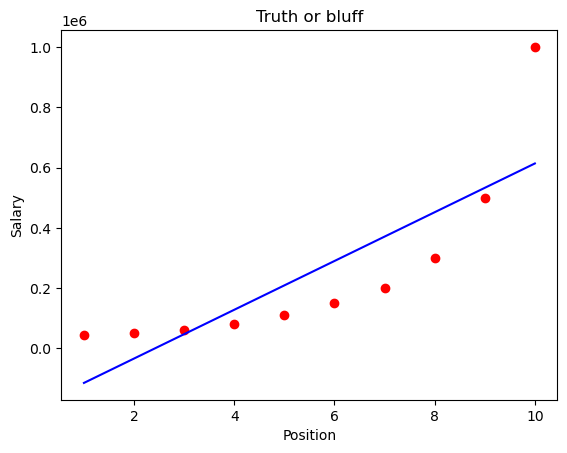

In [20]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color="red")
plt.plot(x,lr.predict(x),color="blue")
plt.title("Truth or bluff")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

In [22]:
from sklearn.preprocessing import PolynomialFeatures
pr= PolynomialFeatures(degree=4)
x_poly = pr.fit_transform(x)
pr.fit(x_poly,y)
lr1 = LinearRegression()
lr1.fit(x_poly,y)


LinearRegression()

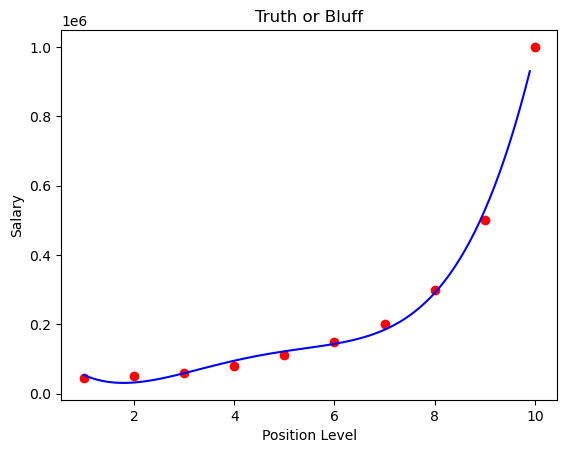

In [25]:
# Visualising the polynomial regression result
import numpy as np
x_grid = np.arange(min(x),max(x),0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,color="red")
plt.plot(x_grid,lr1.predict(pr.fit_transform(x_grid)),color = "blue")
plt.title("Truth or Bluff")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

In [35]:
Score = lr1.score(x_poly,y)
Score

0.9973922891706614

In [38]:
lr.predict([[8.5]])

array([492136.36363636])

In [39]:
lr1.predict(pr.fit_transform([[8.5]]))

array([387705.69274467])